In [1]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer



In [2]:

rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ee/exp_fil_data")
rv.write_stats()

df_stats = rv.fetch_stats()
# df_stats_ext = df_stats.filter((pl.col("run_id") <= 2))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))

run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))

display(df_agg)

NameError: name 'df_stats_ext' is not defined

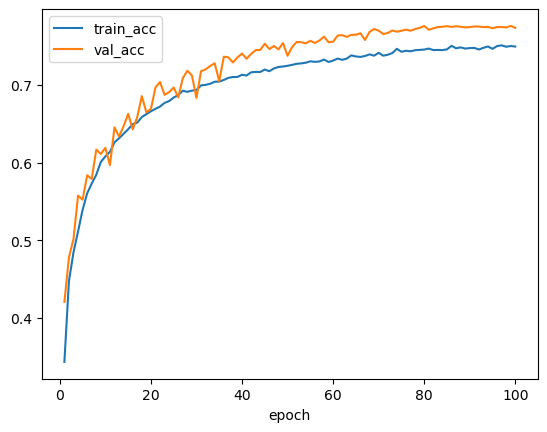

In [ ]:
x_col = "epoch"
y_cols = ["train_acc", "val_acc"]

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)
ax[0][0].set_xlabel(x_col)

for y_col in y_cols:
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        # label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[y_col][0]
        label = y_col

    ax[0][0].plot(x, y, label=label)

ax[0][0].legend()





In [ ]:
x_col = "epoch"
y_cols = "val_loss"
label_col = "run_id"

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)
ax[0][0].set_xlabel(x_col)

for y_col in y_cols:
    ax[0][0].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

    ax[0][0].plot(x, y, label=label)

ax[0][0].legend()





NameError: name 'plt' is not defined